In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ts_modelling.data_producer import DataProducer
from ts_modelling.simple_experiment import SimpleExp
from argparse import Namespace
import yaml
import torch
%matplotlib inline

with open('args.yaml', 'r') as file:
    config = yaml.safe_load(file)
args = Namespace(**config)
exp = SimpleExp(args)

length = 5000

Use CPU
self_supervised head


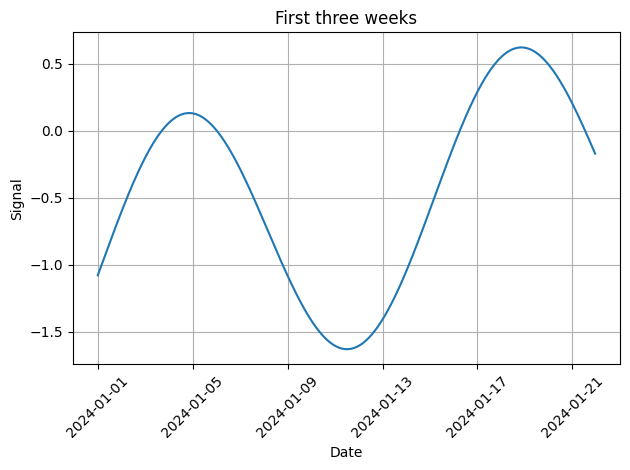

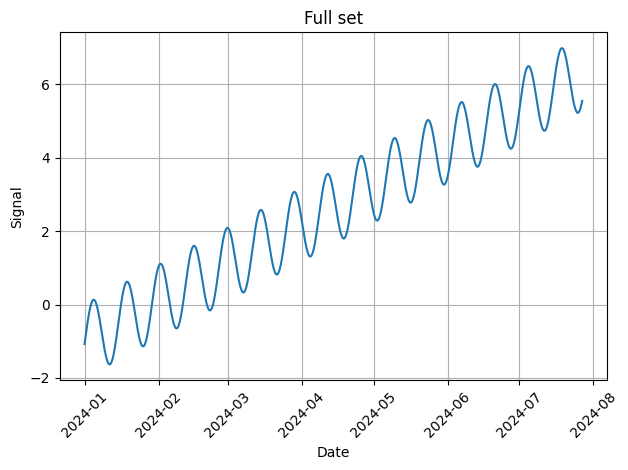

In [2]:
dp = DataProducer(length=length, n_vars=1, path=args.root_path, noise_amp=0)
dp.add_sine([(1/336, 1)])
dp.add_trend(1, 1/336)
dp.plot_data()
dp.generate_csv()

In [3]:
def forward_hook(module, input, output):
    print("Module:", module.__class__.__name__)
    print("Input:", input[0].shape)
    print("Output:", output.shape)
    print(10*'-')

In [4]:
length = 2000
num_train = 1000
num_test = 400
num_val = length - num_train - num_test
seq_len = 100

left_border_idx = [0, num_train - seq_len, length - num_test - seq_len]
right_border_idx = [num_train, num_train + num_val, length]

In [5]:
left_border = left_border_idx[0]
right_border = right_border_idx[0]

In [6]:
left_border

0

In [9]:
import pandas as pd
target = 'signal'
features = 'M'
df_raw = pd.DataFrame(
    {'junk': [0],
     'signal': [5],
     'noise': [50],
     'date': ['2006']}
)
if features == 'S':
    cols_of_interest = [target]
else:
    cols = df_raw.columns.tolist()
    if 'date' in cols:
        cols.remove('date')
    cols.remove(target)
    cols_of_interest = [*cols, target]

data = df_raw.loc[left_border:right_border, cols_of_interest]
data

NameError: name 'left_border' is not defined

In [14]:
import os
filename = os.path.basename(args.data_path)
root, extension = os.path.splitext(filename)
extension

'.csv'

In [2]:
exp.model

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

In [2]:
exp.pretrain_model()

Trainable parameters:	106508
Total parameters:		106509
train 2974
val 310
test 809
Validation loss decreased (inf --> 3.016200).  Saving model ...
Updating learning rate to 2.815846884401866e-05
Validation loss decreased (3.016200 --> 0.288062).  Saving model ...
Updating learning rate to 7.631589133909879e-05
Validation loss decreased (0.288062 --> 0.056330).  Saving model ...
Updating learning rate to 9.99999600115311e-05
Validation loss decreased (0.056330 --> 0.008345).  Saving model ...
Updating learning rate to 9.965453823531276e-05
epoch: 5, train loss: 0.12368, validation loss: 0.0062991, test loss: 0.009177
epoch time: 2.0998027324676514
Validation loss decreased (0.008345 --> 0.006299).  Saving model ...
Updating learning rate to 9.863762671567892e-05
EarlyStopping counter: 1 out of 15
Updating learning rate to 9.69629774364373e-05
EarlyStopping counter: 2 out of 15
Updating learning rate to 9.46532371562558e-05
EarlyStopping counter: 3 out of 15
Updating learning rate to 9.1

In [3]:
exp.train_predict_head()

Trainable parameters:	712896
Total parameters:		817857
train 2974
val 310
test 809
Validation loss decreased (inf --> 0.162928).  Saving model ...
Updating learning rate to 2.815846884401866e-05
Validation loss decreased (0.162928 --> 0.091666).  Saving model ...
Updating learning rate to 7.631589133909879e-05
Validation loss decreased (0.091666 --> 0.041009).  Saving model ...
Updating learning rate to 9.99999600115311e-05
Validation loss decreased (0.041009 --> 0.020078).  Saving model ...
Updating learning rate to 9.965453823531276e-05
epoch: 5, train loss: 0.10843, validation loss: 0.010206, test loss: 0.0099417
epoch time: 1.2013781070709229
Validation loss decreased (0.020078 --> 0.010206).  Saving model ...
Updating learning rate to 9.863762671567892e-05
Validation loss decreased (0.010206 --> 0.006803).  Saving model ...
Updating learning rate to 9.69629774364373e-05
Validation loss decreased (0.006803 --> 0.004999).  Saving model ...
Updating learning rate to 9.46532371562558e

In [4]:
exp.finetune_model()

Trainable parameters:	817857
Total parameters:		817857
train 2974
val 310
test 809
Validation loss decreased (inf --> 0.001931).  Saving model ...
Updating learning rate to 2.815846884401866e-05
EarlyStopping counter: 1 out of 15
Updating learning rate to 7.631589133909879e-05
EarlyStopping counter: 2 out of 15
Updating learning rate to 9.99999600115311e-05
EarlyStopping counter: 3 out of 15
Updating learning rate to 9.965453823531276e-05
epoch: 5, train loss: 0.024591, validation loss: 0.0013622, test loss: 0.0014063
epoch time: 2.568263292312622
Validation loss decreased (0.001931 --> 0.001362).  Saving model ...
Updating learning rate to 9.863762671567892e-05
Validation loss decreased (0.001362 --> 0.001221).  Saving model ...
Updating learning rate to 9.69629774364373e-05
EarlyStopping counter: 1 out of 15
Updating learning rate to 9.46532371562558e-05
Validation loss decreased (0.001221 --> 0.000948).  Saving model ...
Updating learning rate to 9.173964115010166e-05
EarlyStopping 

In [2]:
exp.load_model()


In [4]:
exp.test()

test 809


In [5]:
x = np.load('test_results/PTST_test/input_pred_true/input.npy')
yhat = np.load('test_results/PTST_test/input_pred_true/pred.npy')
y = np.load('test_results/PTST_test/input_pred_true/true.npy')

In [14]:
from PatchTST.PatchTST_supervised.utils.metrics import metric

array([0.20075686, 0.19998366, 0.19982955, 0.20015141, 0.20016155,
       0.19986324, 0.19923507, 0.19971585, 0.19941734, 0.19956692,
       0.19972187, 0.19948104, 0.19984356, 0.19861813, 0.19963333,
       0.199551  , 0.19913955, 0.20022365, 0.19955902, 0.19930819,
       0.19973348, 0.19948632, 0.19877815, 0.19993715, 0.19925185,
       0.19987243, 0.19876774, 0.20032948, 0.20027229, 0.19971067,
       0.20043893, 0.20056163, 0.20006068, 0.20057236, 0.2007759 ,
       0.20081647, 0.2004589 , 0.20077455, 0.20142141, 0.20078915,
       0.20129985, 0.20202743, 0.20150083, 0.20198959, 0.20270835,
       0.20227817, 0.2018916 , 0.20286277, 0.20318535, 0.20301117,
       0.20350467, 0.20405442, 0.20348237, 0.2042577 , 0.20326145,
       0.20366539, 0.20462407, 0.2047392 , 0.20418727, 0.2050771 ,
       0.20479542, 0.20514771, 0.20462249, 0.20560293, 0.20514019,
       0.20501508, 0.20536539, 0.20627873, 0.20558712, 0.20668016,
       0.20658308, 0.20704658, 0.20672202, 0.20644003, 0.20674

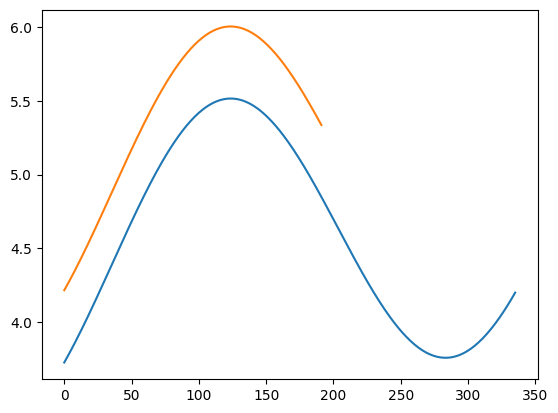

In [7]:
plt.plot(x[0,:,0])
plt.plot(y[0,:,0])

In [4]:
exp.model

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

In [4]:
exp.args.training_task = 'supervised'
exp.train()

Trainable parameters:	712896
Total parameters:		817857
train 2973
val 309
test 809
Validation loss decreased (inf --> 0.017844).  Saving model ...
Updating learning rate to 9.999964010416366e-05
Validation loss decreased (0.017844 --> 0.001809).  Saving model ...
Updating learning rate to 9.69194207852955e-05
Validation loss decreased (0.001809 --> 0.000900).  Saving model ...
Updating learning rate to 8.818005098577033e-05
Validation loss decreased (0.000900 --> 0.000711).  Saving model ...
Updating learning rate to 7.483562768277244e-05
epoch: 5, train loss: 0.015703, validation loss: 0.00052858, test loss: 0.00049945
epoch time: 1.6927330493927002
Validation loss decreased (0.000711 --> 0.000529).  Saving model ...
Updating learning rate to 5.849568526935634e-05
Validation loss decreased (0.000529 --> 0.000437).  Saving model ...
Updating learning rate to 4.113106195244662e-05
Validation loss decreased (0.000437 --> 0.000281).  Saving model ...
Updating learning rate to 2.4836187578

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

In [5]:
for param in exp.model.model.backbone.parameters():
    param.requires_grad = True

exp.train()

Trainable parameters:	817857
Total parameters:		817857
train 2973
val 309
test 809
Validation loss decreased (inf --> 0.001132).  Saving model ...
Updating learning rate to 9.999964010416366e-05
Validation loss decreased (0.001132 --> 0.000965).  Saving model ...
Updating learning rate to 9.69194207852955e-05
Validation loss decreased (0.000965 --> 0.000880).  Saving model ...
Updating learning rate to 8.818005098577033e-05
Validation loss decreased (0.000880 --> 0.000568).  Saving model ...
Updating learning rate to 7.483562768277244e-05
epoch: 5, train loss: 0.0081161, validation loss: 0.00041399, test loss: 0.00039396
epoch time: 3.291706085205078
Validation loss decreased (0.000568 --> 0.000414).  Saving model ...
Updating learning rate to 5.849568526935634e-05
Validation loss decreased (0.000414 --> 0.000299).  Saving model ...
Updating learning rate to 4.113106195244662e-05
Validation loss decreased (0.000299 --> 0.000185).  Saving model ...
Updating learning rate to 2.4836187578

Model(
  (model): PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((0, 12))
    (backbone): TSTiEncoder(
      (W_P): Linear(in_features=12, out_features=128, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (encoder): TSTEncoder(
        (layers): ModuleList(
          (0): TSTEncoderLayer(
            (self_attn): _MultiheadAttention(
              (W_Q): Linear(in_features=128, out_features=128, bias=True)
              (W_K): Linear(in_features=128, out_features=128, bias=True)
              (W_V): Linear(in_features=128, out_features=128, bias=True)
              (sdp_attn): _ScaledDotProductAttention(
                (attn_dropout): Dropout(p=0.0, inplace=False)
              )
              (to_out): Sequential(
                (0): Linear(in_features=128, out_features=128, bias=True)
                (1): Dropout(p=0.3, inplace=False)
              )
            )
            (dropout_attn): Dropout(p=0.3, inplace=False)
  

## todo:
- make model be able data of same input (permute/view or something)
- hide some patches (after patching in backbone forward)
- validate in same manner
  - a first approach is to use the mse loss as usual, however this will be a bit blunt since we will get a lot of patches that are fed to the model
  - a better way would be to only calculate the loss of missing patches, however this requires some more work


In [8]:
sum(p. for p in exp.model.model.backbone.parameters())

104961

In [15]:
total_params = 0
print('Name: \t Params:')
for name, parameter in exp.model.model.head.named_parameters():
    if not parameter.requires_grad:
        continue
    params = parameter.numel()
    print(f'{name}\t {params}')
    total_params += params
print(f"Total Trainable Params: {total_params}")

Name: 	 Params:
linear.weight	 712704
linear.bias	 192
Total Trainable Params: 712896
